In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("./resource/datasets_heart.csv")
# Drop the null columns where all values are null
dataset = dataset.dropna(axis='columns', how='all')
# Drop the null rows
dataset = dataset.dropna()
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
dataset = dataset.copy()

df_dummies = pd.get_dummies(dataset)
df_dummies.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
model = SVC(probability=True)

In [5]:
X = df_dummies.drop('target', axis =1)
y = df_dummies['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [7]:
y_pred = model.predict(X_test)

In [8]:
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import learning_curve

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.02      0.05        42
           1       0.58      0.98      0.73        58

    accuracy                           0.58       100
   macro avg       0.54      0.50      0.39       100
weighted avg       0.55      0.58      0.44       100



In [10]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80        42
           1       0.87      0.83      0.85        58

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



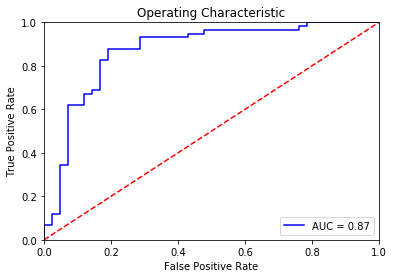

In [13]:
y_prob = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [14]:
train_sizes, train_scores, test_scores = learning_curve(SVC(), X_train, y_train, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 20), cv = 3)

In [15]:
train_scores = np.mean(train_scores, axis = 1)
test_scores = np.mean(test_scores, axis = 1)

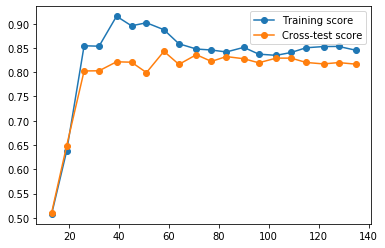

In [16]:
plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Cross-test score")
plt.legend();

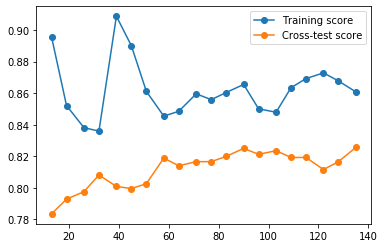

In [17]:
train_sizes, train_scores, test_scores = learning_curve(SVC(C=2), X_train, y_train, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 20), cv = 3)
train_scores = np.mean(train_scores, axis = 1)
test_scores = np.mean(test_scores, axis = 1)
plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Cross-test score")
plt.legend();

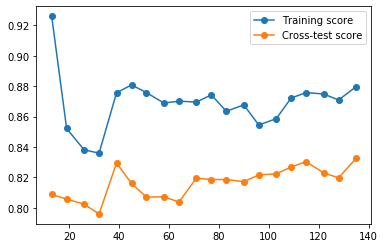

In [18]:
train_sizes, train_scores, test_scores = learning_curve(SVC(C=3), X_train, y_train, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 20), cv = 3)
train_scores = np.mean(train_scores, axis = 1)
test_scores = np.mean(test_scores, axis = 1)
plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Cross-test score")
plt.legend()

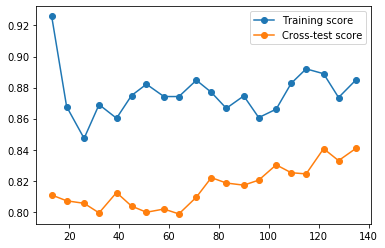

In [19]:
train_sizes, train_scores, test_scores = learning_curve(SVC(C=3, gamma=0.1), X_train, y_train, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 20), cv = 3)
train_scores = np.mean(train_scores, axis = 1)
test_scores = np.mean(test_scores, axis = 1)
plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Cross-test score")
plt.legend();

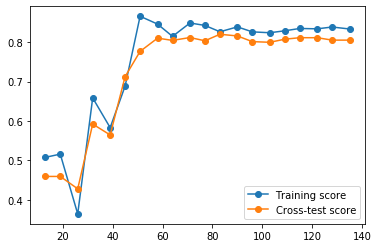

In [20]:
train_sizes, train_scores, test_scores = learning_curve(SVC(C=3, gamma=0.01), X_train, y_train, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 20), cv = 3)
train_scores = np.mean(train_scores, axis = 1)
test_scores = np.mean(test_scores, axis = 1)
plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Cross-test score")
plt.legend();

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid = {'C':[1,2,3,4,5,6,7,8,14], 'gamma':[0.1, 0.01, 0.001, 0.0001], 'kernel':['linear', 'poly', 'rbf'], 'degree': [1,2,3,4,5]}
grid = GridSearchCV(param_grid= param_grid, estimator= SVC(), scoring='f1', refit= True, verbose=1)

In [23]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:   14.3s finished
C:\Users\donkp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 14],
                         'degree': [1, 2, 3, 4, 5],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [24]:
grid.best_params_

{'C': 14, 'degree': 1, 'gamma': 0.1, 'kernel': 'linear'}

In [25]:
y_pred = grid.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        42
           1       0.86      0.83      0.84        58

    accuracy                           0.82       100
   macro avg       0.81      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



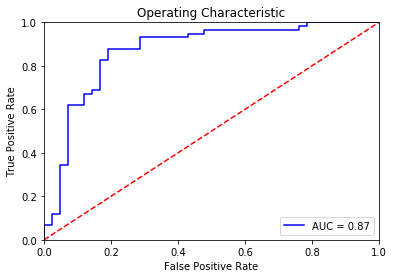

In [27]:
# y_prob = grid.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [28]:
SVM_HDataset = pd.DataFrame({'Test':y_test, 'Prediction':y_pred, 'Probability': y_prob[:,1]})

In [29]:
SVM_HDataset.to_csv('./resource/SVM_HDataset.csv')